In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hyundai-motor-company-stock-historical-price/005380.KS.csv
/kaggle/input/hyundai-motor-company-stock-historical-price/005380.KS_monthly.csv
/kaggle/input/hyundai-motor-company-stock-historical-price/005380.KS_weekly.csv


# **Yearly analysis**

In [2]:
stocks=pd.read_csv("../input/hyundai-motor-company-stock-historical-price/005380.KS.csv")
stocks.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.101563,445332
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.289063,530496
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.398438,769406
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.210938,586187
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.562500,888701


In [3]:
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
stocks.duplicated().values.any()

False

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1603 non-null   object 
 1   Open       1603 non-null   float64
 2   High       1603 non-null   float64
 3   Low        1603 non-null   float64
 4   Close      1603 non-null   float64
 5   Adj Close  1603 non-null   float64
 6   Volume     1603 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.8+ KB


In [6]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1.603000e+03
mean,154459.950094,156520.586400,152471.740487,154466.188397,143966.175716,8.983801e+05
std,37577.359481,38015.182924,37040.854472,37432.047025,39950.647065,1.034027e+06
min,67200.000000,71000.000000,65000.000000,65900.000000,63380.367188,0.000000e+00
25%,128500.000000,130500.000000,127000.000000,128750.000000,116526.562500,4.253640e+05
50%,145000.000000,147000.000000,143500.000000,144500.000000,128477.992188,5.952190e+05
75%,176000.000000,178500.000000,173250.000000,176000.000000,172568.484375,9.468445e+05
max,271000.000000,289000.000000,259500.000000,267500.000000,261410.781250,1.993370e+07


In [7]:
stocks[['High','Open','Low','Close']].max()

High     289000.0
Open     271000.0
Low      259500.0
Close    267500.0
dtype: float64

In [8]:
stocks[['High','Open','Low','Close']].min()

High     71000.0
Open     67200.0
Low      65000.0
Close    65900.0
dtype: float64

<AxesSubplot:>

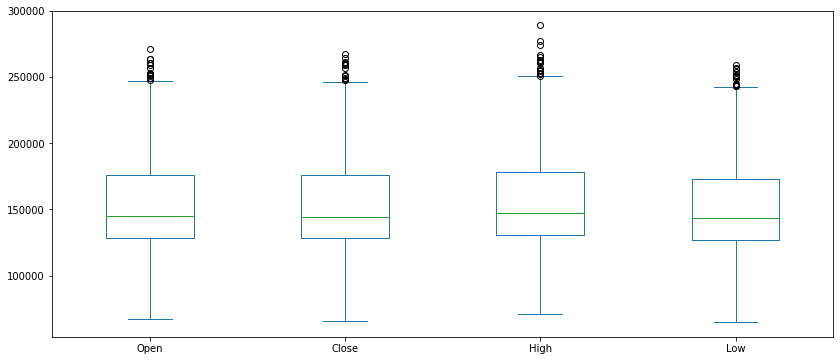

In [9]:
stocks[['Open','Close','High','Low']].plot(kind='box', figsize=(14,6))

<AxesSubplot:xlabel='Date', ylabel='Open'>

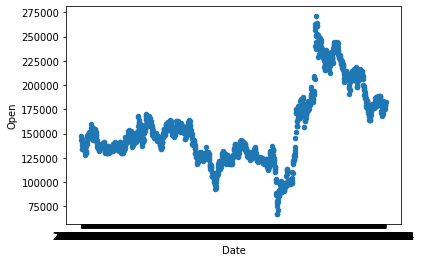

In [10]:
stocks.plot.scatter(y='Open', x='Date')

<AxesSubplot:xlabel='Date', ylabel='High'>

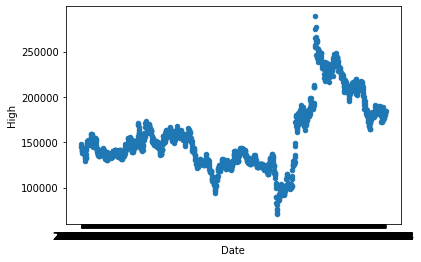

In [11]:
stocks.plot.scatter(y='High', x='Date')

<AxesSubplot:xlabel='Date', ylabel='Low'>

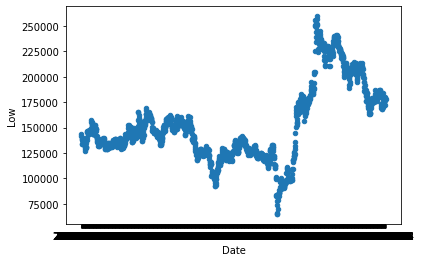

In [12]:
stocks.plot.scatter(y='Low', x='Date')

In [13]:
corr=stocks.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998434,0.998828,0.997503,0.985399,0.133942
High,0.998434,1.000000,0.998081,0.998908,0.986862,0.164426
Low,0.998828,0.998081,1.000000,0.998663,0.986117,0.118787
Close,0.997503,0.998908,0.998663,1.000000,0.987340,0.144390
Adj Close,0.985399,0.986862,0.986117,0.987340,1.000000,0.182122
Volume,0.133942,0.164426,0.118787,0.144390,0.182122,1.000000


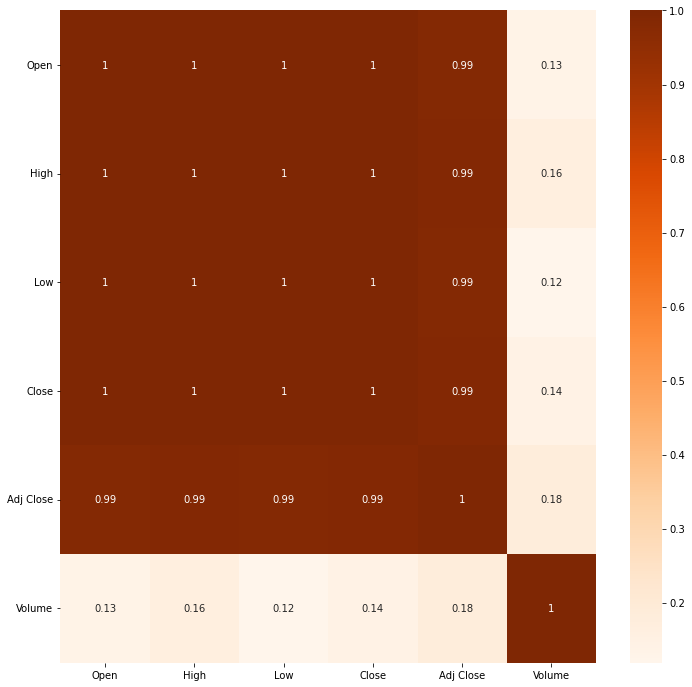

In [14]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

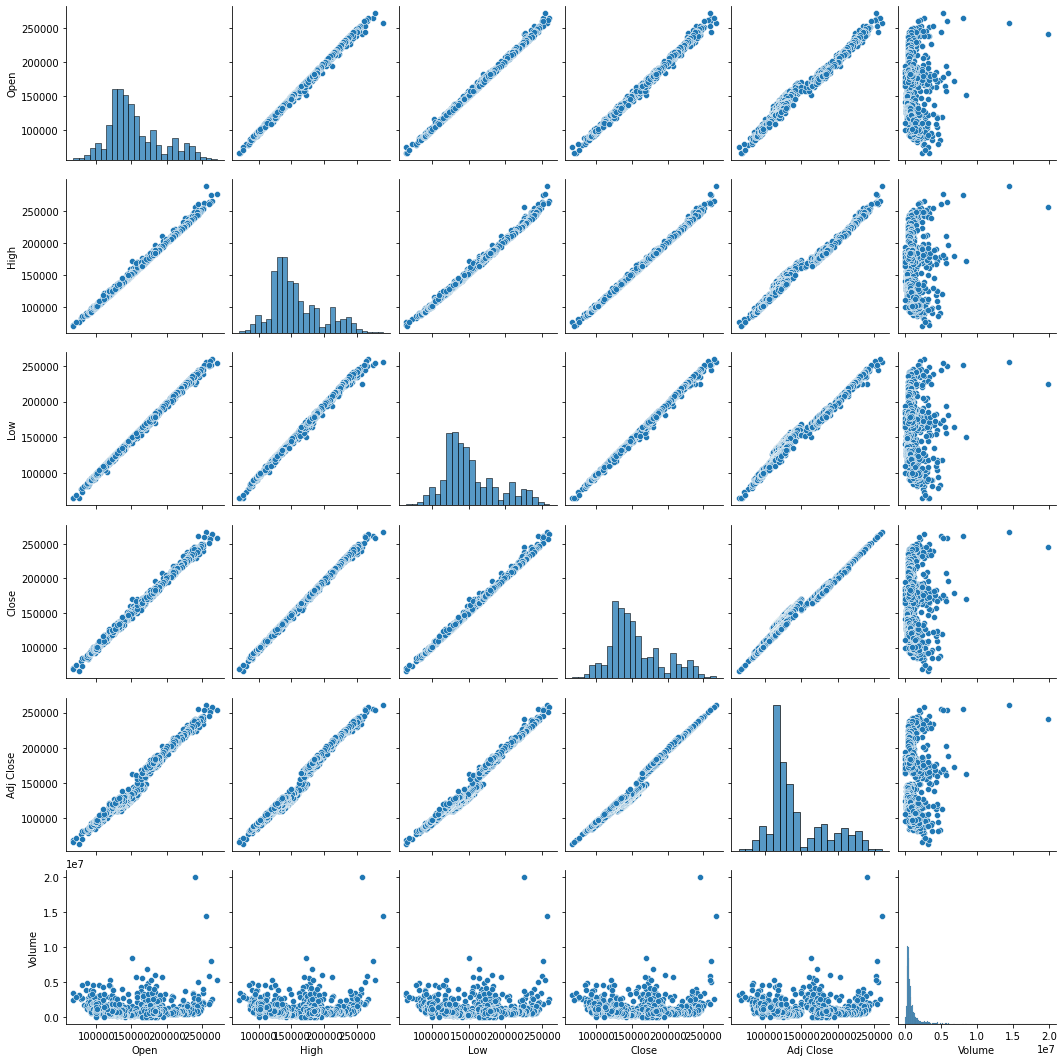

In [15]:
sns.pairplot(stocks)

# **Monthly analysis**

In [16]:
stock_month= pd.read_csv('../input/hyundai-motor-company-stock-historical-price/005380.KS_monthly.csv')
stock_month.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-01,132000.0,153000.0,126500.0,147500.0,125916.968750,10251020
1,2016-03-01,147500.0,159500.0,143500.0,152500.0,130185.335938,10301411
2,2016-04-01,152500.0,155000.0,142000.0,143500.0,122502.265625,7926098
3,2016-05-01,142000.0,144000.0,131500.0,139500.0,119087.601563,9731425
4,2016-06-01,137500.0,144000.0,133500.0,135500.0,115672.890625,12447763


In [17]:
stock_month.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
stock_month.duplicated().values.any()

False

In [19]:
stock_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       79 non-null     object 
 1   Open       79 non-null     float64
 2   High       79 non-null     float64
 3   Low        79 non-null     float64
 4   Close      79 non-null     float64
 5   Adj Close  79 non-null     float64
 6   Volume     79 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 4.4+ KB


In [20]:
stock_month.describe()

,Open,High,Low,Close,Adj Close,Volume
count,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01
mean,154292.405063,165311.392405,144936.708861,154835.443038,144590.879549,1.811373e+07
std,35852.288745,39349.274217,34870.214228,35764.597299,38425.053719,1.573611e+07
min,88500.000000,99600.000000,65000.000000,88700.000000,85308.632813,7.633910e+05
25%,129750.000000,137250.000000,123000.000000,129500.000000,117623.851563,1.039048e+07
50%,144500.000000,155500.000000,136500.000000,145000.000000,129024.101563,1.244776e+07
75%,178500.000000,188500.000000,167000.000000,180500.000000,177530.257812,1.803651e+07
max,238500.000000,289000.000000,232000.000000,239500.000000,234048.156250,9.850560e+07


<AxesSubplot:>

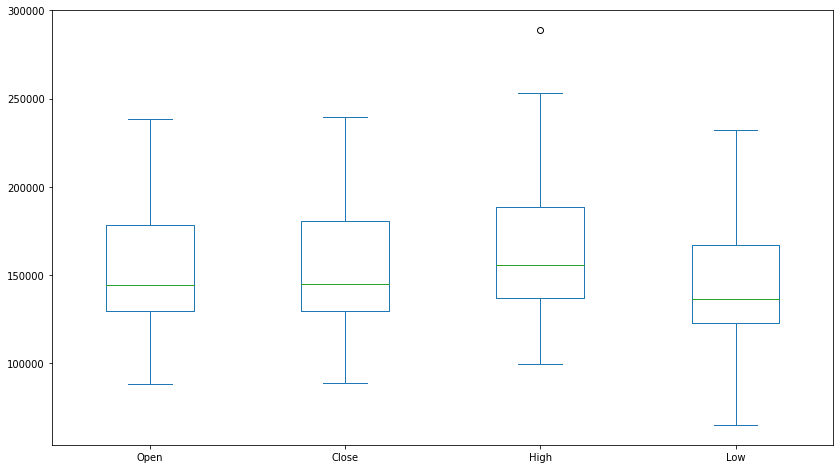

In [21]:
stock_month[['Open','Close','High','Low']].plot(kind='box', figsize=(14,8))

<AxesSubplot:xlabel='Date', ylabel='Open'>

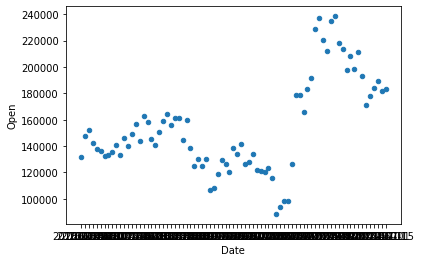

In [22]:
stock_month.plot.scatter(y='Open', x='Date')

<AxesSubplot:xlabel='Date', ylabel='High'>

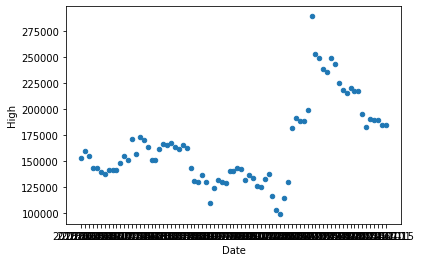

In [23]:
stock_month.plot.scatter(y='High', x='Date')

<AxesSubplot:xlabel='Date', ylabel='Low'>

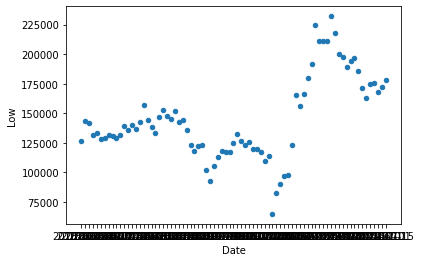

In [24]:
stock_month.plot.scatter(y='Low', x='Date')

In [25]:
corr=stock_month.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.941456,0.971496,0.929471,0.924567,0.013800
High,0.941456,1.000000,0.949640,0.970420,0.963787,0.265444
Low,0.971496,0.949640,1.000000,0.968654,0.953988,0.015494
Close,0.929471,0.970420,0.968654,1.000000,0.985869,0.168244
Adj Close,0.924567,0.963787,0.953988,0.985869,1.000000,0.216421
Volume,0.013800,0.265444,0.015494,0.168244,0.216421,1.000000


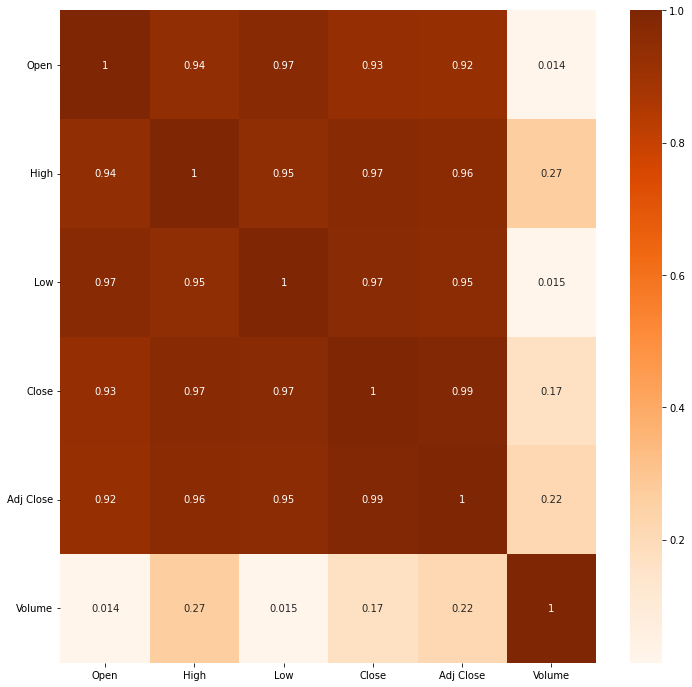

In [26]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

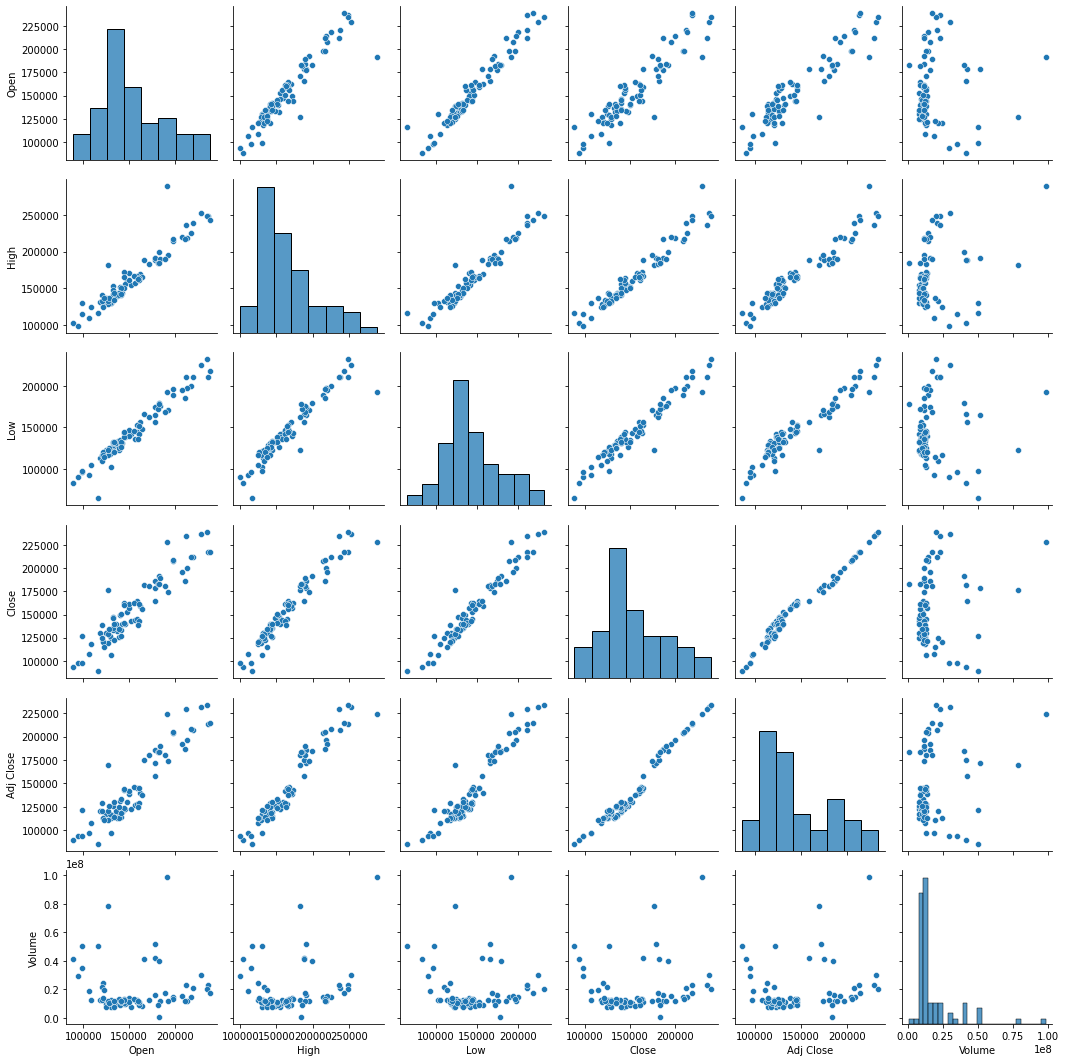

In [27]:
sns.pairplot(stock_month)

# **Weekly analysis**

In [28]:
stock_week=pd.read_csv('../input/hyundai-motor-company-stock-historical-price/005380.KS_weekly.csv')
stock_week.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,147500.0,148000.0,133500.0,136500.0,116526.539063,3220122
1,2016-01-11,134500.0,143500.0,134000.0,138500.0,118233.898438,2501073
2,2016-01-18,137500.0,140500.0,135500.0,139000.0,118660.750000,2285396
3,2016-01-25,140000.0,140500.0,131000.0,133000.0,113538.687500,3281741
4,2016-02-01,132000.0,133500.0,126500.0,133500.0,113965.515625,3047107


In [29]:
stock_week.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
stock_week.duplicated().values.any()

False

In [31]:
stock_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       342 non-null    object 
 1   Open       342 non-null    float64
 2   High       342 non-null    float64
 3   Low        342 non-null    float64
 4   Close      342 non-null    float64
 5   Adj Close  342 non-null    float64
 6   Volume     342 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.8+ KB


In [32]:
stock_week.describe()

,Open,High,Low,Close,Adj Close,Volume
count,342.000000,342.000000,342.000000,342.000000,342.000000,3.420000e+02
mean,154238.596491,159373.099415,149745.906433,154426.608187,143922.938185,4.217172e+06
std,37154.957695,38522.489623,36118.193451,37042.945983,39615.847822,4.162961e+06
min,67200.000000,89500.000000,65000.000000,71100.000000,68381.546875,0.000000e+00
25%,129000.000000,132125.000000,125125.000000,129500.000000,116913.523438,2.239722e+06
50%,145250.000000,150500.000000,141000.000000,144500.000000,128146.863282,2.909600e+06
75%,174875.000000,182000.000000,170625.000000,175875.000000,172668.800781,4.186032e+06
max,256500.000000,289000.000000,239000.000000,257000.000000,251149.812500,3.558453e+07


<AxesSubplot:>

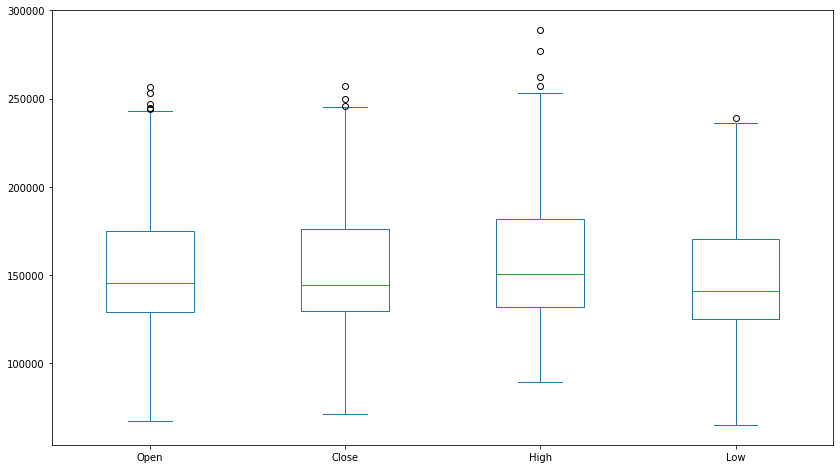

In [33]:
stock_week[['Open','Close','High','Low']].plot(kind='box', figsize=(14,8))

<AxesSubplot:xlabel='Date', ylabel='Open'>

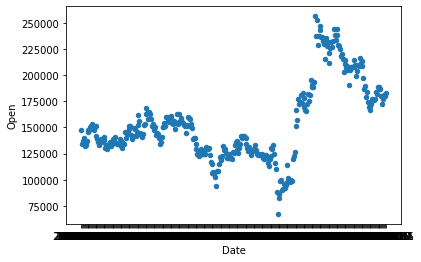

In [34]:
stock_week.plot.scatter(y='Open', x='Date')

<AxesSubplot:xlabel='Date', ylabel='High'>

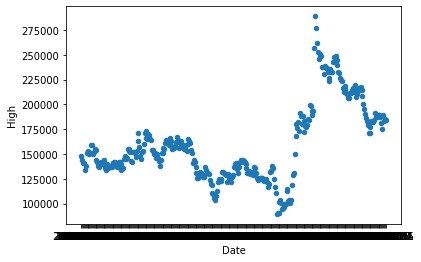

In [35]:
stock_week.plot.scatter(y='High', x='Date')

<AxesSubplot:xlabel='Date', ylabel='Low'>

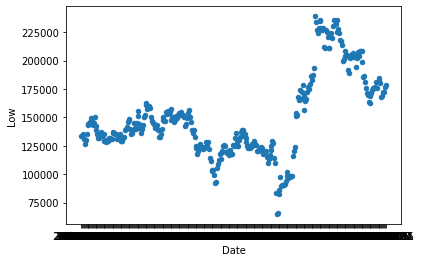

In [36]:
stock_week.plot.scatter(y='Low', x='Date')

In [37]:
corr= stock_week.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.987790,0.994195,0.982138,0.970889,0.118305
High,0.987790,1.000000,0.987867,0.992832,0.981911,0.218262
Low,0.994195,0.987867,1.000000,0.991172,0.977500,0.100173
Close,0.982138,0.992832,0.991172,1.000000,0.987148,0.164358
Adj Close,0.970889,0.981911,0.977500,0.987148,1.000000,0.208961
Volume,0.118305,0.218262,0.100173,0.164358,0.208961,1.000000


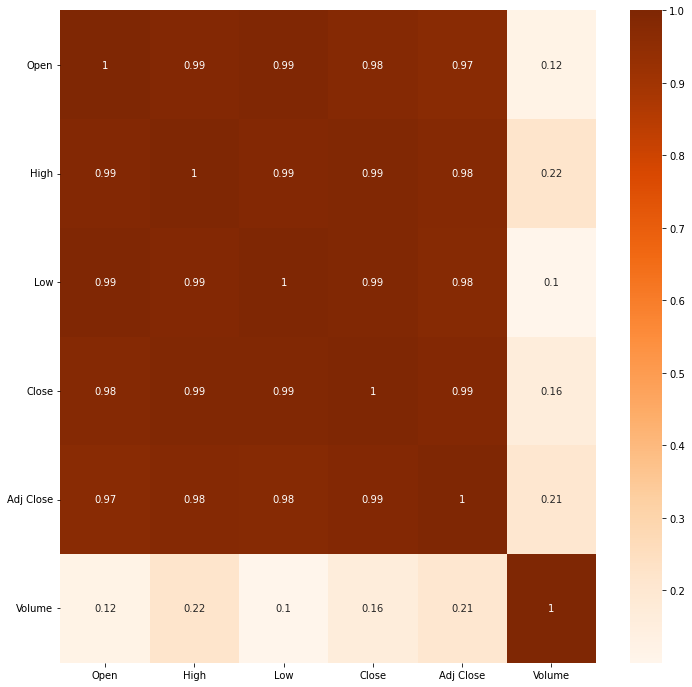

In [38]:
cp = sns.heatmap(corr,cmap='Oranges', annot=True)
plt.gcf().set_size_inches(12,12)

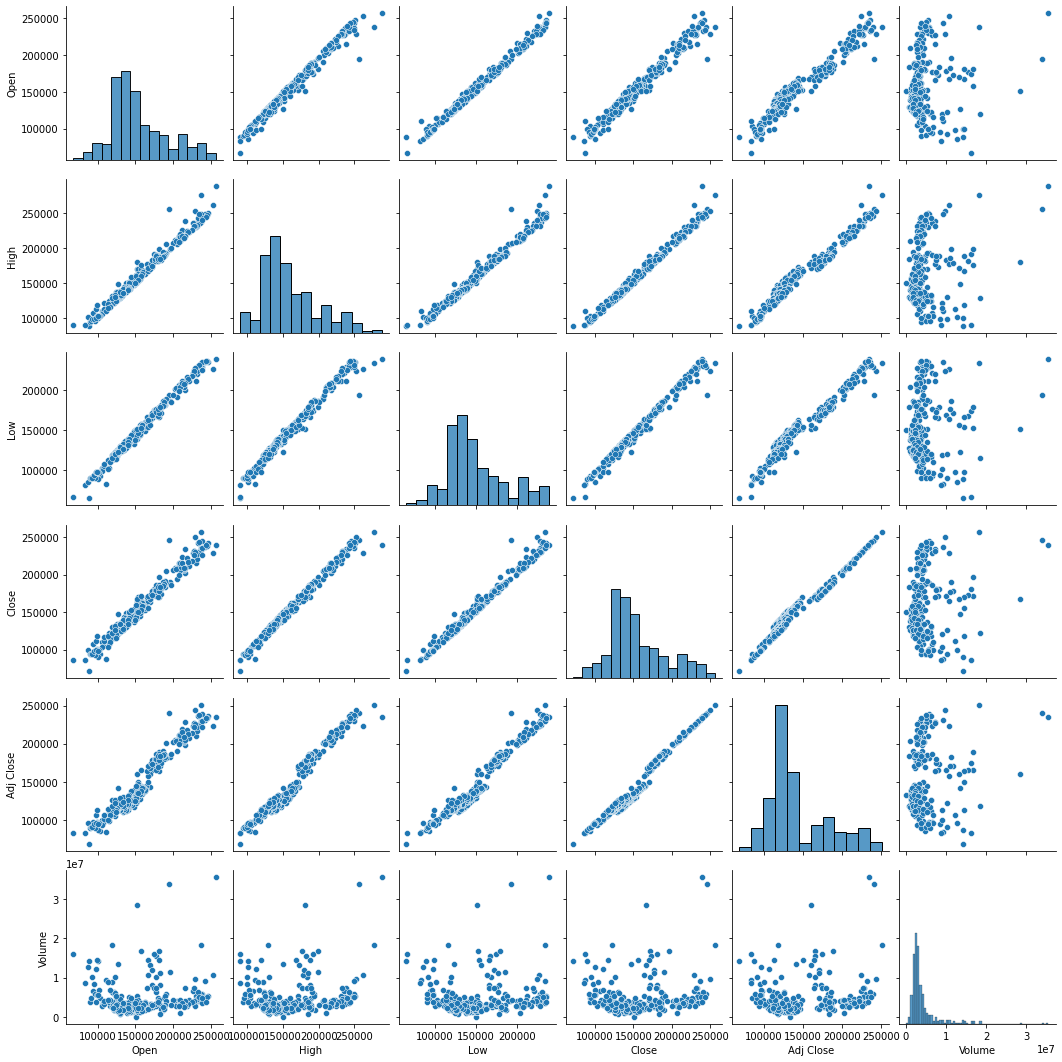

In [39]:
sns.pairplot(stock_week)